TARGET COLUMN:salary_in_usd

| **Column Name**         | **Description**                                                                 |
| ----------------------- | ------------------------------------------------------------------------------- |
| **work\_year**          | The year in which the salary data was reported.                                 |
| **experience\_level**   | The professional experience level of the employee (e.g., EN = Entry, MI = Mid). |
| **employment\_type**    | Type of employment contract (e.g., FT = Full-time, PT = Part-time).             |
| **job\_title**          | The specific job title of the employee.                                         |
| **salary**              | The gross salary amount in the original currency.                               |
| **salary\_currency**    | The currency in which the salary was paid.                                      |
| **salary\_in\_usd**     | The salary converted to USD for standardization.                                |
| **employee\_residence** | The country where the employee lives.                                           |
| **remote\_ratio**       | The percentage of remote work (0 = on-site, 50 = hybrid, 100 = fully remote).   |
| **company\_location**   | The country where the employer’s office is located.                             |
| **company\_size**       | The size of the company (S = Small, M = Medium, L = Large).                     |


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Fix the import statement for matplotlib
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('ds_salaries.csv',encoding='unicode_escape')

In [4]:
df.head(50)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [5]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [6]:
df.shape

(607, 12)

In [7]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


DROPPING UNNECESSARY COLUMNS

In [9]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [11]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [12]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
df.groupby('work_year')['salary_in_usd'].mean()


work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64

In [14]:
df.groupby('work_year')['remote_ratio'].mean()


work_year
2020    64.583333
2021    69.124424
2022    73.584906
Name: remote_ratio, dtype: float64

In [68]:
Colors = [
    '#2d0834',  # deep purple
    '#65103f',  # dark magenta
    '#a31649',  # rose red
    '#d12c43',  # red
    '#ef5b3c',  # orange coral
    '#f9a882'   # light peach
]

In [130]:
sns.set_palette("Set2") 

<Axes: xlabel='work_year'>

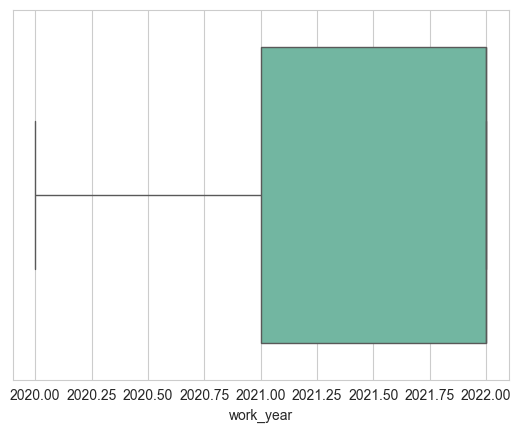

In [131]:
sns.boxplot(x="work_year",data=df)

<Axes: xlabel='salary_in_usd'>

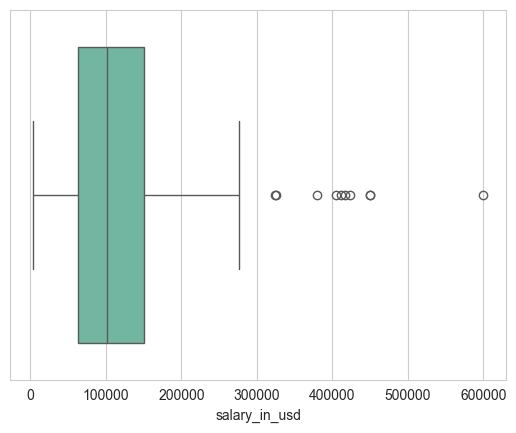

In [132]:
sns.boxplot(x="salary_in_usd",data=df)

<Axes: xlabel='remote_ratio'>

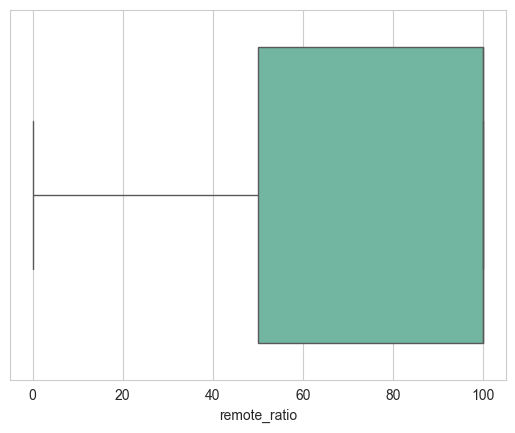

In [133]:
sns.boxplot(x="remote_ratio",data=df)

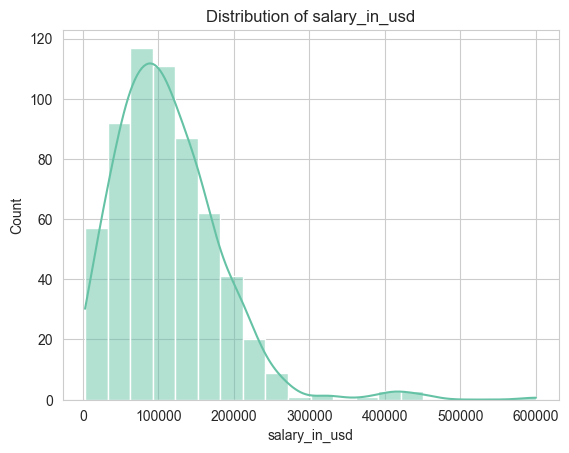

In [134]:
sns.histplot(df['salary_in_usd'], bins=20, kde=True)
plt.title('Distribution of salary_in_usd')
plt.xlabel('salary_in_usd')
plt.ylabel('Count')
plt.show()

In [135]:
Colors = [
    '#2d0834',  # deep purple
    '#65103f',  # dark magenta
    '#a31649',  # rose red
    '#d12c43',  # red
    '#ef5b3c',  # orange coral
    '#f9a882'   # light peach
]

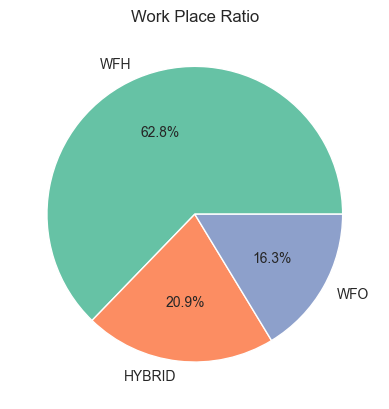

In [136]:
labels=['WFH','HYBRID','WFO']
df['remote_ratio'].value_counts().plot.pie(autopct='%1.1f%%', labels=labels)
plt.title('Work Place Ratio')

plt.ylabel('')
plt.show()

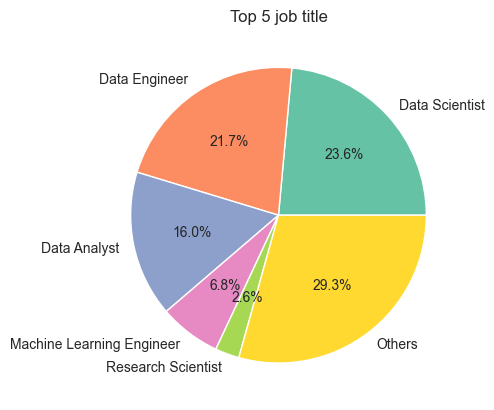

In [137]:
top_job=df['job_title'].value_counts().nlargest(5)
others=df['job_title'].value_counts().iloc[5:].sum()
top_job['Others']=others

top_job.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 job title')

plt.ylabel('')
plt.show()

Text(0, 0.5, 'salary_in_usd')

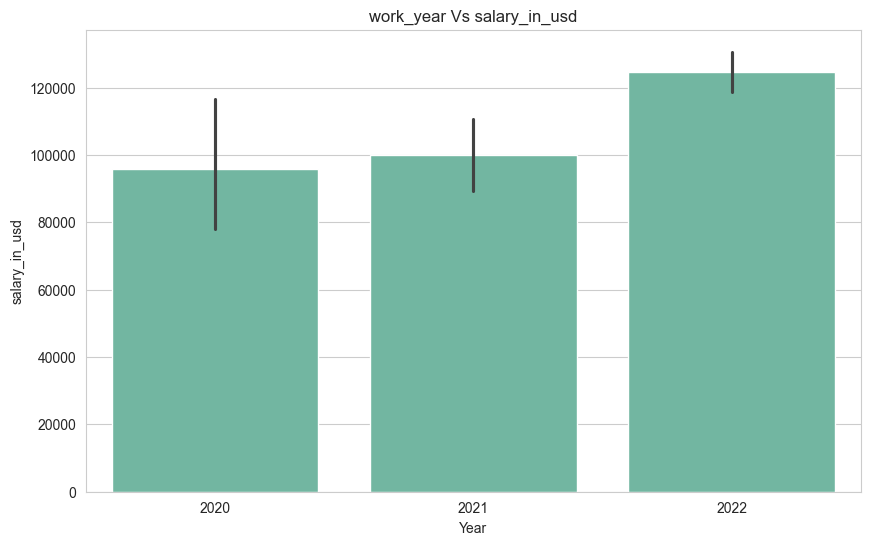

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x='work_year', y='salary_in_usd', data=df)
plt.title('work_year Vs salary_in_usd')
plt.xlabel('Year')
plt.ylabel('salary_in_usd')

<Axes: xlabel='count', ylabel='job_title'>

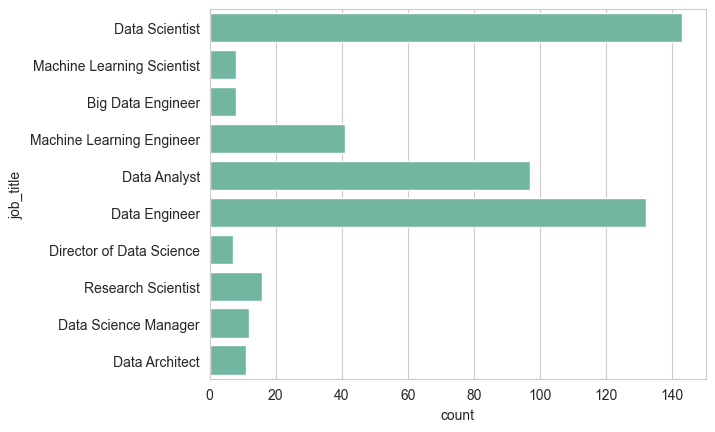

In [139]:
top_jobs = df['job_title'].value_counts().nlargest(10).index
sns.countplot(data=df[df['job_title'].isin(top_jobs)], y='job_title')


<Axes: xlabel='experience_level', ylabel='employment_type'>

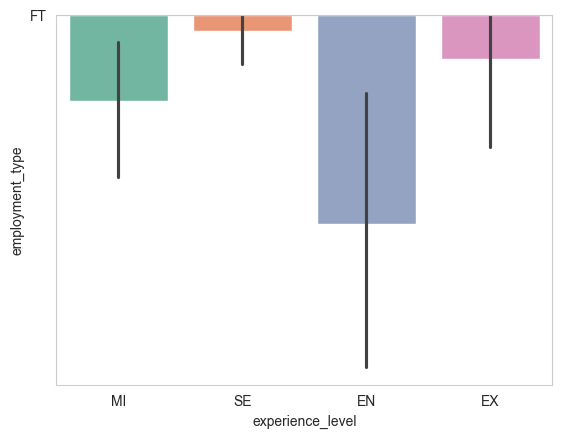

In [140]:

sns.barplot(x='experience_level', y='employment_type', data=df, palette='Set2')



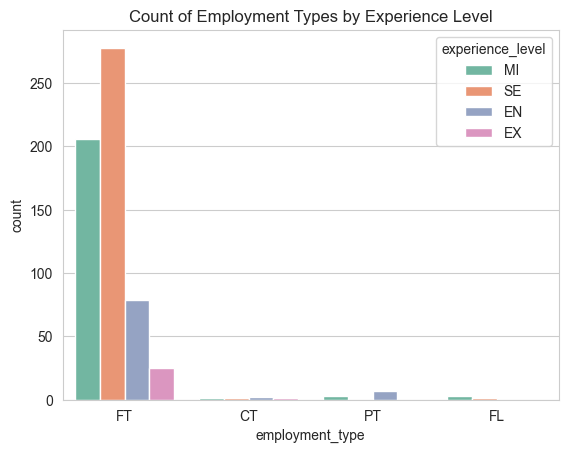

In [141]:
sns.countplot(hue='experience_level', x='employment_type', data=df, palette='Set2')
plt.title('Count of Employment Types by Experience Level')
plt.show()


<Axes: >

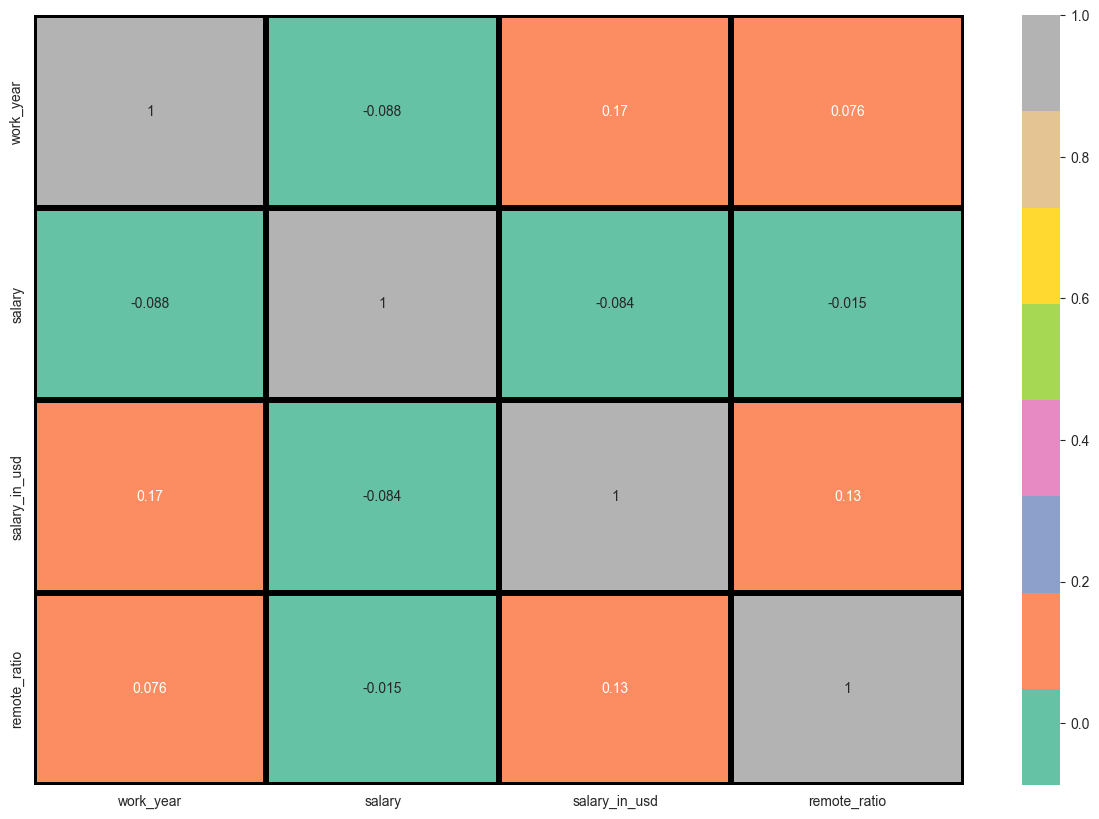

In [142]:
num=df.select_dtypes(include='number')
correlation=num.corr()
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(),annot=True,linewidths=4,linecolor='k',cmap='Set2')

In [81]:
dataset=pd.get_dummies(df,dtype=int,drop_first=True) 
dataset

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2020,70000,79833,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,260000,260000,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,85000,109024,50,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2020,20000,20000,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,150000,150000,50,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,154000,100,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
603,2022,126000,126000,100,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
604,2022,129000,129000,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
605,2022,150000,150000,100,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Columns: 182 entries, work_year to company_size_S
dtypes: int64(182)
memory usage: 863.2 KB


In [83]:
X=dataset.drop(['salary_in_usd'],axis=1)
Y=dataset['salary_in_usd']

In [84]:
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [85]:
print('Shape of X train is-', x_train.shape)
print('Shape of X_test is-', x_test.shape)
print('Shape of y_train is-' ,y_train.shape)
print('Shape of y_test is-', y_test.shape)

Shape of X train is- (485, 181)
Shape of X_test is- (122, 181)
Shape of y_train is- (485,)
Shape of y_test is- (122,)


In [86]:
model = RandomForestRegressor() 
model.fit(x_train, y_train) 


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
prediction = model.predict(x_test)
prediction

array([ 90320.  ,  89687.6 ,  48305.86,  35660.78, 109682.48, 130008.5 ,
        75846.17, 265153.  ,  58420.68, 138331.95, 210033.85, 135065.96,
        60641.83, 159920.4 ,  55730.95,  59651.2 ,  21499.18, 159902.66,
        93282.99, 220262.  , 153829.2 , 224403.  ,  66341.59, 243400.  ,
       209990.92,  56373.36,  68754.24, 105812.8 ,  69584.61, 165063.64,
       220254.99, 207386.82, 109392.9 , 214627.95, 120000.  ,  45522.96,
       170010.  , 135000.  , 128773.02, 135079.4 , 129673.85,  55574.95,
       152641.4 ,  88313.8 ,  63979.1 ,  83381.77, 213542.97, 128029.14,
       140398.  ,  67163.29,  69292.65,  89703.58,  20185.  ,  48051.74,
        49478.28, 123090.2 ,  88131.4 , 147556.1 , 184794.6 , 210033.85,
        59992.64,  64186.74,  51230.15, 112856.84,  93111.64, 209788.84,
        52742.66,  84990.64, 159843.86,   9024.44,  98231.85, 251600.58,
        99883.  , 136749.5 , 111125.26,  34514.67, 144703.5 ,  89269.51,
       150010.  ,  69663.83,  64788.77,  46267.02, 

In [44]:
r2_score(y_test,model.predict(x_test))


0.8875813556798658

88 %

In [45]:
mean_squared_error(y_test, model.predict(x_test))

429702634.4470533